# **FRAUD DETECTION - MACHINE LEARNING**

---

By : Ni Made Yuli Cahyani

**Goals of The Project:**
*   Learn how to classifying fraudulent and valid transactions
*   Learn how to explore data, preprocessing data and implement some various machine laerning methods and analys their performances



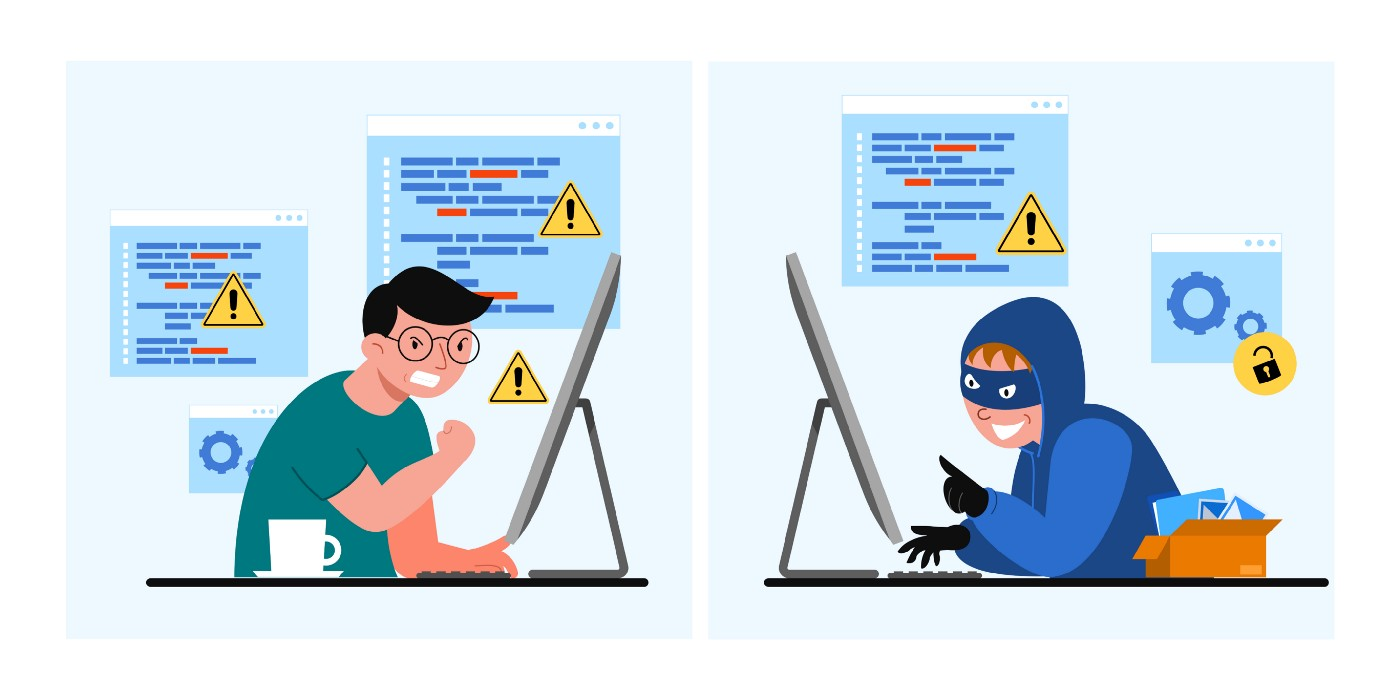

**About Dataset:**

Dataset that used in this project is Synthetic Financial Datasets For Fraud Detection from Kaggle.

 | About                   | Description                                                                              |
  | ----------------------- | --------------------------------------------------------------------------------------- |
  | Source                  | Synthetic Financial Datasets For Fraud Detection : [Kaggle](https://www.kaggle.com/datasets/ealaxi/paysim1) |
  | Dataset Owner           | Edgar Lopez-Rojas                                                                           |
  | Lisensi                 | CC BY-SA 4.0                                                                |
  | Category                | Finance, Crime           |
  | Usability       | 8.82(Gold)                                                                            |
  | File type and size | CSV (493.53 MiB)   

This dataset was a sample of a much larger dataset generated from a simulation that closely resembles the normal day-to-day transactions including the occurrence of fraudulent transactions. The dataset was made for performing research on fraud detection methods.

Here are the variables in the dataset:
* step - `integer` - maps a unit of time in the real 
world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

* type - `string/categorical` - type of transaction: CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

* amount - `float` - amount of the transaction in local currency.

* nameOrig - `string` - customer who initiated the transaction

* oldbalanceOrg - `float` - initial balance before the transaction

* newbalanceOrig - `float` - new balance after the transaction

* nameDest - `string` - customer who is the recipient of the transaction

* oldbalanceDest - `float` - initial balance of recipient before the transaction.

* newbalanceDest - `float` - new balance of recipient after the transaction.

* isFraud - `boolean/binary` - determines if transaction is fraudulent (encoded as 1) or valid (encoded as 0)

* isFlaggedFraud - `boolean/binary` - determines if transaction is flagged as fraudulent (encoded as 1) or not flagged at all (encoded as 0). An observation is flagged if the transaction is fraudulent and it involved a transfer of over 200,000 in the local currency.

# **Import Libraries**

In [ ]:
!pip install opendatasets --quiet

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from random import seed,sample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, roc_curve, auc,\
precision_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

# **Download & Loading Data**

In [ ]:
download_url = 'https://www.kaggle.com/datasets/ealaxi/paysim1'

od.download(download_url)

Skipping, found downloaded files in "./paysim1" (use force=True to force download)


In [ ]:
data = pd.read_csv("/content/paysim1/PS_20174392719_1491204439457_log.csv")

# **Exploratory Data Analysis and Visualization**

## Dataset Summary

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.shape

(6362620, 11)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [ ]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [ ]:
data.duplicated().sum()

0

According to the basic observation on the dataset:

*   The dataset has 11 columns (variables) and over 6 million observations
*   There are columns that contain numerical values and some columns contain categorical values
*   There no missing values
*   There seems to be no duplicate data
*   Based on the dataset, in this project we are going to make classification on the target variable isFraud



## Distribution of Fraud and Valid Transactions

In [ ]:
isFraud = data['isFraud'].value_counts()
isFraud

0    6354407
1       8213
Name: isFraud, dtype: int64

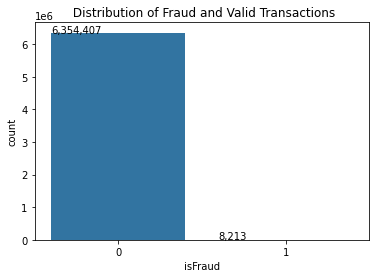

In [ ]:
ax = sns.countplot(x=data["isFraud"])
ax.set_title(" Distribution of Fraud and Valid Transactions")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

* Number of valid transactions - 6,354,407
* Number of fraud transactions - 8,213

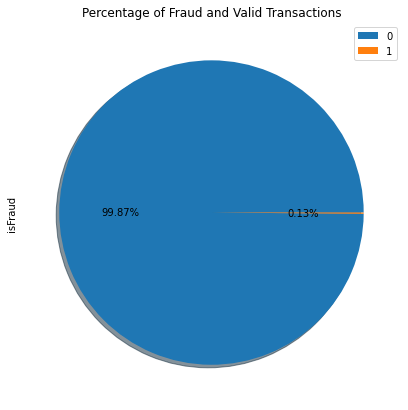

In [ ]:
isFraud.plot(kind="pie",figsize=(7,7),autopct="%1.2f%%",
         shadow=True,labels=None, title="Percentage of Fraud and Valid Transactions")
plt.legend(labels=isFraud.index,loc="best")
plt.show()

* The data seem unbalance beetween fraud and valid transaction. 

* The percentage of fraud transactions is 0.13% and valid transactions is 99.87%

## Relation between Fraud Transactions and Flagged Fraud Transactions by The System

In [ ]:
isFlaggedFraud_isFraud = data.groupby(['isFlaggedFraud','isFraud']).size()
isFlaggedFraud_isFraud

isFlaggedFraud  isFraud
0               0          6354407
                1             8197
1               1               16
dtype: int64

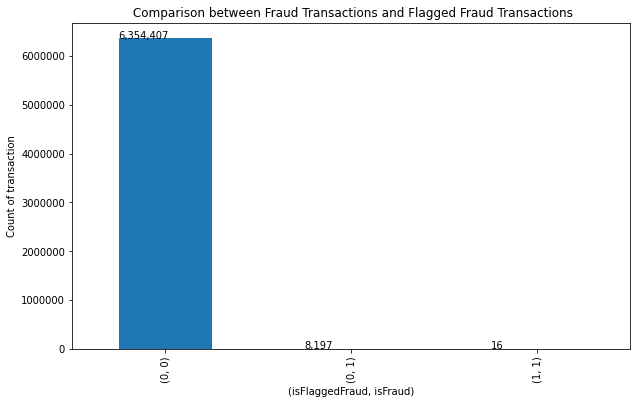

In [ ]:
ax = isFlaggedFraud_isFraud.plot(kind='bar',figsize=(10, 6))
ax.set_title(" Comparison between Fraud Transactions and Flagged Fraud Transactions")
ax.set_xlabel("(isFlaggedFraud, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

* Number of transactions that are valid - 6,354,407

* Number of transactions that are Fraud but not Flagged by the system - 8,197

* Number of transactions that are Fraud and are Flagged by the system - 16

## Distribution of the Transaction Type

In [ ]:
transaction_type = data['type'].value_counts()
transaction_type

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

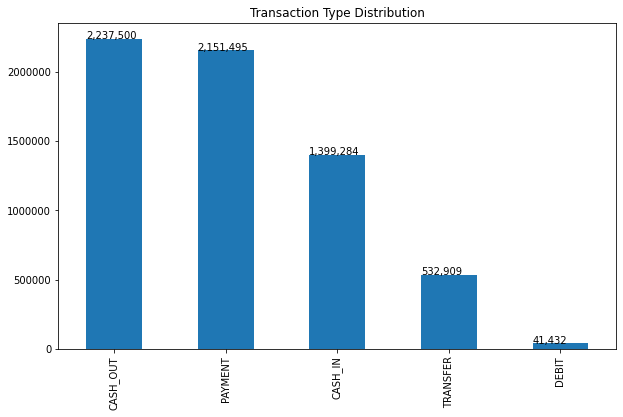

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
transaction_type.plot(kind='bar', title="Transaction Type Distribution", ax=ax, figsize=(10,6))
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
plt.show()



*   The type of transactions are most in CASH_OUT - 2,237,500 and least in DEBIT - 41,432


## Distribution of Fraud and Valid Transaction by Type

In [ ]:
fraud = data[data["isFraud"] == 1]
valid = data[data["isFraud"] == 0]

In [ ]:
print("Fraud transactions by type: \n",fraud['type'].value_counts())
print("\n Valid transactions by type: \n",valid['type'].value_counts())

Fraud transactions by type: 
 CASH_OUT    4116
TRANSFER    4097
Name: type, dtype: int64

 Valid transactions by type: 
 CASH_OUT    2233384
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     528812
DEBIT         41432
Name: type, dtype: int64


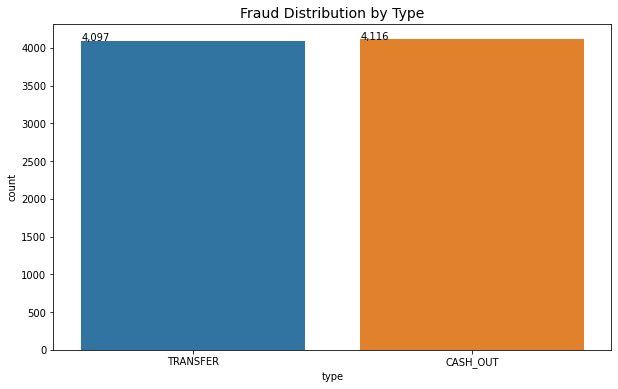

In [ ]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
ax=sns.countplot(fraud['type'])
plt.title('Fraud Distribution by Type', fontsize=14)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

plt.show()

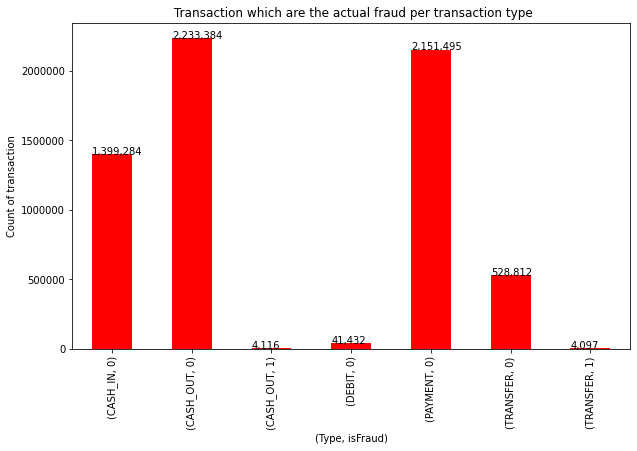

In [ ]:
ax = data.groupby(['type', 'isFraud']).size().plot(kind='bar',figsize=(10, 6), color='red')
ax.set_title(" Transaction which are the actual fraud per transaction type")
ax.set_xlabel("(Type, isFraud)")
ax.set_ylabel("Count of transaction")
plt.ticklabel_format(style='plain', axis='y')
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))

* From the dataset, it seems that fraud transactions only occur when the transaction type is CASH_OUT or TRANSFER
* From the above graph we can see that the Fraud Transactions are from CASH_OUT(4116) and TRANSFER(4097)


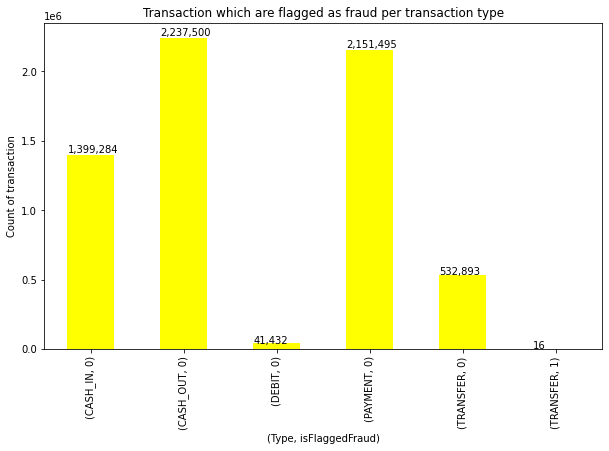

In [ ]:
ax = data.groupby(['type', 'isFlaggedFraud']).size().plot(kind='bar',figsize=(10, 6), color='yellow')
ax.set_title("Transaction which are flagged as fraud per transaction type")
ax.set_xlabel("(Type, isFlaggedFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

* There are 16 transactions that are Flagged as fraud which from TRANSFER. So out of 4097 fraud transactions from transfers only 16 were flagged by the system

* There is no transactions are flagged as fraud from cash out. Its mean out of 4116 fraud transactions from CASH OUT 0 transactions flagged by system


**conclusion :**

So, only 16 out of 6 million transactions were flagged by the system. Since isFlaggedFraud is set just 16 times in a seemingly meaningless way, we can treat this feature as insignificant and discard it in the dataset without loosing information.

## Distribution of Account Type - 'nameOrig' and 'nameDest'

One feature of this dataset that is not immediately presented on the kaggle overview page is the account types "C" (customer) and "M" (Merchant), which would be the first character for each value under nameOrig and nameDest.

Then we will create a feature "accountType" which is a categorical variable with levels "CC" (Customer to Customer), "CM" (Customer to Merchant), "MC" (Merchant to Customer), "MM" (Merchant to Merchant).

In [ ]:
print('Transaction Customer to Customer', len(data[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C')]))
print('Transaction Customer to Merchant', len(data[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M')]))
print('Transaction Merchant to Customer', len(data[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C')]))
print('Transaction Merchant to Merchant', len(data[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M')]))

Transaction Customer to Customer 4211125
Transaction Customer to Merchant 2151495
Transaction Merchant to Customer 0
Transaction Merchant to Merchant 0


In [ ]:
data_new = data.copy()
data_new["accountType"] = np.nan

data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('C'),"accountType"] = "CC" 
data_new.loc[data.nameOrig.str.contains('C') & data.nameDest.str.contains('M'),"accountType"] = "CM"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('C'),"accountType"] = "MC"
data_new.loc[data.nameOrig.str.contains('M') & data.nameDest.str.contains('M'),"accountType"] = "MM"

* In the dataset there are only transaction from customer to customer and customer to merchant
* Number of transactions that are customer to customer - 4211125
* Number of transactions that are customer to merchant - 2151495
* There are no merchants among originator accounts

## Distribution of Transaction Type by Account Type

In [ ]:
transaction_type_by_accountType = data_new.groupby(['accountType','type']).size()
transaction_type_by_accountType

accountType  type    
CC           CASH_IN     1399284
             CASH_OUT    2237500
             DEBIT         41432
             TRANSFER     532909
CM           PAYMENT     2151495
dtype: int64

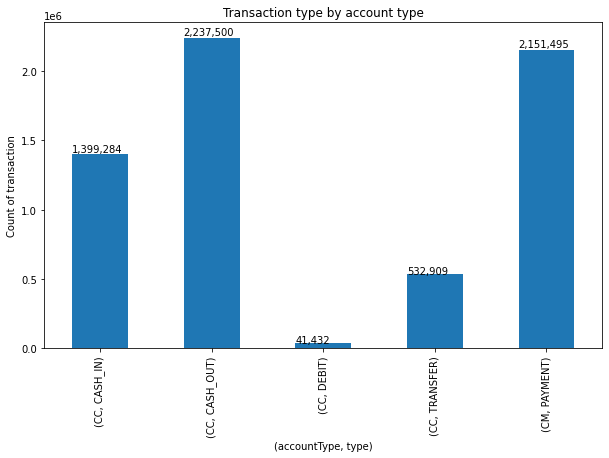

In [ ]:
ax = data_new.groupby(['accountType','type']).size().plot(kind='bar',figsize=(10, 6))
ax.set_title("Transaction type by account type")
ax.set_xlabel("(accountType, type)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

* Most in trasaction type (Cash In, Cash Out, Debit and Transfer) have account type customer to customer, only transaction type payment that has account type customer to merchant.

* Merchant accounts were only identified in 'Payment' type transactions as destination account

## Distribution of Fraud and Valid Transaction by Account Type

In [ ]:
fraud_new = data_new[data_new["isFraud"] == 1]
valid_new  = data_new[data_new["isFraud"] == 0]

In [ ]:
print("Fraud transactions by accountType: \n",fraud_new['accountType'].value_counts())
print("\n Valid transactions by accountType: \n",valid_new['accountType'].value_counts())

Fraud transactions by accountType: 
 CC    8213
Name: accountType, dtype: int64

 Valid transactions by accountType: 
 CC    4202912
CM    2151495
Name: accountType, dtype: int64


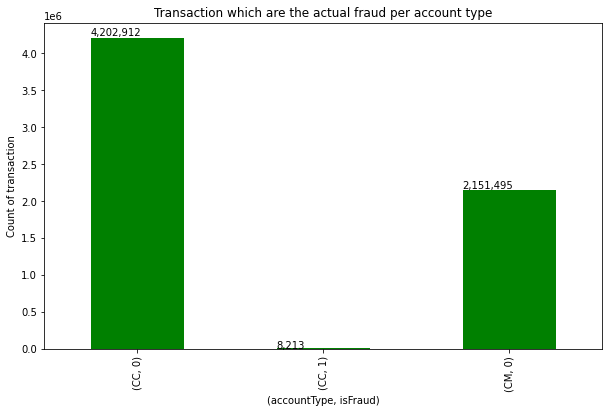

In [ ]:
ax = data_new.groupby(['accountType', 'isFraud']).size().plot(kind='bar',figsize=(10, 6), color='green')
ax.set_title("Transaction which are the actual fraud per account type")
ax.set_xlabel("(accountType, isFraud)")
ax.set_ylabel("Count of transaction")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

* From the dataset, it seems that fraud transactions only occur when the account type is CC (Customer to Customer)
* Merchant accounts are not included in the fraud Transactions

**conclusion :**

From the above analysis, we do not get any benificial information from the nameOrig or nameDest, so we'll dont use these columns

## Balances Before and After The Transaction

In [ ]:
wrong_orig_bal = sum(data["oldbalanceOrg"] - data["amount"] != data["newbalanceOrig"])
wrong_dest_bal = sum(data["newbalanceDest"] + data["amount"] != data["newbalanceDest"])

In [ ]:
print("Percentage of observations with balance errors in the account giving money: ", 100*round(wrong_orig_bal/len(data),2))
print("Percentage of observations with balance errors in the account receiving money: ", 100*round(wrong_dest_bal/len(data),2))

Percentage of observations with balance errors in the account giving money:  85.0
Percentage of observations with balance errors in the account receiving money:  100.0


In [ ]:
relevant_cols = data[["amount","oldbalanceOrg","newbalanceOrig","oldbalanceDest","newbalanceDest"]].values.flatten()
# number of observations with negative numbers
num_neg_amt = sum(n < 0 for n in relevant_cols)
# number of observations where the amount given is greater than the amount that is in the sender's account
num_amt_oldgiver = sum(data["amount"] > data["oldbalanceOrg"]) 
# number of observations where the amount received is greater than the amount that is in the receiver's account
num_amt_newreceiver = sum(data["amount"] > data["newbalanceDest"]) 

In [ ]:
print("number of observations with negative numbers: ", num_neg_amt)
print("number of observations where the amount given is greater than the amount that is in the sender's account: "
      , num_amt_oldgiver)
print("number of observations where the amount received is greater than the amount that is in the receiver's account: "
      , num_amt_newreceiver)

number of observations with negative numbers:  0
number of observations where the amount given is greater than the amount that is in the sender's account:  4079080
number of observations where the amount received is greater than the amount that is in the receiver's account:  2661141


* All observations for new balance and old balance have erronous results for both accounts sender and receiver
* Some of this erronous results are due to fraud transactions
* We also cant get rid of the variables oldbalanceOrg, newbalanceOrig, newbalanceDest, oldbalanceDest since they might be important in identifying fraudulent transactions from valid transactions.

However, lets check do these errors differ between fraudulent and valid transactions

In [ ]:
data_new["errorBalanceOrg"] = data_new.newbalanceOrig + data_new.amount - data_new.oldbalanceOrg
data_new["errorBalanceDest"] = data_new.oldbalanceDest + data_new.amount - data_new.newbalanceDest

fraud = data_new[data_new["isFraud"] == 1]
valid = data_new[data_new["isFraud"] == 0]

In [ ]:
print("Proportion of fraud transactions with errorBalanceOrg > 0: ", len(fraud[fraud.errorBalanceOrg > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceOrg > 0: ", len(valid[valid.errorBalanceOrg > 0])/len(valid))
print("Proportion of fraud transactions with errorBalanceDest > 0: ", len(fraud[fraud.errorBalanceDest > 0])/len(fraud))
print("Proportion of valid transactions with errorBalanceDest > 0: ", len(valid[valid.errorBalanceDest > 0])/len(valid))

Proportion of fraud transactions with errorBalanceOrg > 0:  0.006331425788384269
Proportion of valid transactions with errorBalanceOrg > 0:  0.8036598851789003
Proportion of fraud transactions with errorBalanceDest > 0:  0.5712894192134421
Proportion of valid transactions with errorBalanceDest > 0:  0.6413928160408988


* Fraud transactions are much more likely to have errorBalanceDest > 0
* Valid transactions are much more likely to have an errorBalanceOrg > 0

**conclusion :**

From those distinctions above probably make errorBalanceDest and errorBalanceOrg potentially effective features. So, we have to add these two as feature.

## Looking at Transaction Time - 'step'

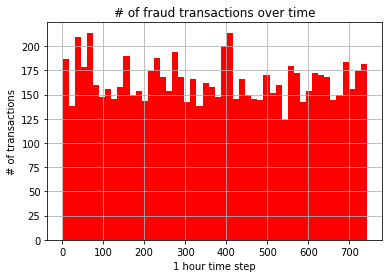

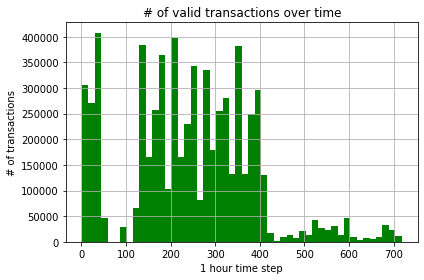

In [ ]:
bins = 50

fraud.hist(column ="step",color="red",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of fraud transactions over time")

valid.hist(column="step",color="green",bins=bins)
plt.xlabel("1 hour time step")
plt.ylabel("# of transactions")
plt.title("# of valid transactions over time")

plt.tight_layout()
plt.show()

* Fraud transactions dont change much throughout the time frame
* A lot of Valid transactions occur during 1 to 50 hours and then again 120 to 410 hrs

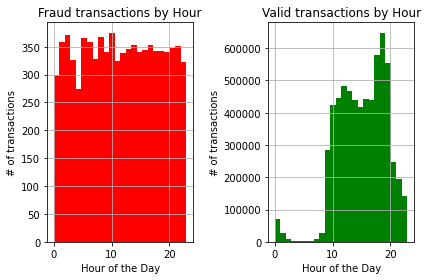

In [ ]:
num_hours = 24
fraud_hours = fraud.step % num_hours
valid_hours = valid.step % num_hours

plt.subplot(1, 2, 1)
fraud_hours.hist(bins=num_hours, color="red")
plt.title('Fraud transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")


plt.subplot(1, 2, 2)
valid_hours.hist(bins=num_hours, color="green")
plt.title('Valid transactions by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel("# of transactions")

plt.tight_layout()
plt.show()

*  From the graphs above, fraud transactions still occur at similar rates to any hour of the day outside of hours 0 to 9. On the other hand, from hour 0 to hour 9, valid transactions very rarely occur. 

**conclusion :**

So we will add hour_of_day as a feature

## Looking at Amount in Transaction

In [ ]:
print('The maximum and minimum amount moved during valid transactions')
print('Max : ', valid['amount'].max())
print('Min : ', valid['amount'].min())
print('\n\nThe maximum and minimum amount moved during fraudulent transactions')
print('Max : ', fraud['amount'].max())
print('Min : ', fraud['amount'].min())

The maximum and minimum amount moved during valid transactions
Max :  92445516.64
Min :  0.01


The maximum and minimum amount moved during fraudulent transactions
Max :  10000000.0
Min :  0.0


In [ ]:
print("Proportion of transactions where the amount moved is greater than 10 million: \n", \
      len(data_new[data_new.amount > 10000000])/len(data_new))

Proportion of transactions where the amount moved is greater than 10 million: 
 0.00038396132410862193


* It seems that during valid transactions, the amount moved is capped at about 92.4 million currency units.

* Whereas for fraudulent transactions, the amount moved is capped at 10 million currency units.

* Only valid transaction involved amounts larger than 10,000,000, however these transactions make up less than 0.01% of the relevant data.

* When the amounts moved is less than 10,000,000 there doesn't seem to be a large difference fraudulent and valid transactions.

# **Data Preprocessing**

Base on exploratory data analysis (EDA) that has been done before, the data processing that we will do are dropping unused columns, adding nuew feature, handling categorical variables, splitting and standardizing data, also handling unbalanced data

## Dropping Unused Column

In [ ]:
df = data.copy()
df = df.drop(['nameOrig', 'nameDest', 'isFlaggedFraud'], axis = 1)
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0


From the exploratory data analysis (EDA), we know that fraud only occurs in TRANSFER and CASH_OUT. So we assemble only the corresponding data in X for analysis.

In [ ]:
df_new = df.loc[(df.type == 'TRANSFER') | (df.type == 'CASH_OUT')]
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0
...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1


## Adding New Feature

In [ ]:
# Adding new feature errorBalanceOrg and errorBalanceDest
df_new["errorbalanceOrg"] = df_new.newbalanceOrig + df_new.amount - df_new.oldbalanceOrg
df_new["errorbalanceDest"] = df_new.oldbalanceDest + df_new.amount - df_new.newbalanceDest
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0.00,1.810000e+02
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06
...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0.00,6.311409e+06
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0.00,8.500025e+05


In [ ]:
# Adding new feature hour_of_day
df_new["HourOfDay"] = np.nan
df_new.HourOfDay = df_new.step % 24
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest,HourOfDay
2,1,TRANSFER,181.00,181.00,0.0,0.00,0.00,1,0.00,1.810000e+02,1
3,1,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04,1
15,1,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05,1
19,1,TRANSFER,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05,1
24,1,TRANSFER,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06,1
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00,23
6362616,743,TRANSFER,6311409.28,6311409.28,0.0,0.00,0.00,1,0.00,6.311409e+06,23
6362617,743,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02,23
6362618,743,TRANSFER,850002.52,850002.52,0.0,0.00,0.00,1,0.00,8.500025e+05,23


## Handling Categorical Variables

In [ ]:
df_new = pd.get_dummies(df_new,prefix=['type'])
df_new

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,errorbalanceOrg,errorbalanceDest,HourOfDay,type_CASH_OUT,type_TRANSFER
2,1,181.00,181.00,0.0,0.00,0.00,1,0.00,1.810000e+02,1,0,1
3,1,181.00,181.00,0.0,21182.00,0.00,1,0.00,2.136300e+04,1,1,0
15,1,229133.94,15325.00,0.0,5083.00,51513.44,0,213808.94,1.827035e+05,1,1,0
19,1,215310.30,705.00,0.0,22425.00,0.00,0,214605.30,2.377353e+05,1,0,1
24,1,311685.89,10835.00,0.0,6267.00,2719172.89,0,300850.89,-2.401220e+06,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,339682.13,0.0,0.00,339682.13,1,0.00,0.000000e+00,23,1,0
6362616,743,6311409.28,6311409.28,0.0,0.00,0.00,1,0.00,6.311409e+06,23,0,1
6362617,743,6311409.28,6311409.28,0.0,68488.84,6379898.11,1,0.00,1.000000e-02,23,1,0
6362618,743,850002.52,850002.52,0.0,0.00,0.00,1,0.00,8.500025e+05,23,0,1


## Handling Unbalanced Data

This dataset is severely unbalanced (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting.

There is a type of oversampling called SMOTE (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

In [ ]:
dataset = df_new.copy()
smote_dataset = df_new.copy()

In [ ]:
#original unbalanced
X = dataset.drop("isFraud",1)
Y = dataset.isFraud

#smote balanced
X_smote = smote_dataset.drop("isFraud",1)
Y_smote = smote_dataset.isFraud

In [ ]:
over = SMOTE(random_state=42)
under = RandomUnderSampler(random_state=42)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps = steps)
X_smote, Y_smote = pipeline.fit_resample(X_smote, Y_smote)

In [ ]:
value_counts = Counter(Y_smote)
print(value_counts)

Counter({0: 2762196, 1: 2762196})


## Splitting and  Standardizing Data

In [ ]:
seed(21)
#original
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

#smote
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_smote, Y_smote, test_size = 0.2, random_state = 42)

In [ ]:
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

print("Shape of X_train_smote: ", X_train_smote.shape)
print("Shape of X_test_smote: ", X_test_smote.shape)

Shape of X_train:  (2216327, 11)
Shape of X_test:  (554082, 11)
Shape of X_train_smote:  (4419513, 11)
Shape of X_test_smote:  (1104879, 11)


In [ ]:
#original unbalanced
print('Train')
print(y_train.value_counts())
print('\nTest')
print(y_test.value_counts())

Train
0    2209760
1       6567
Name: isFraud, dtype: int64

Test
0    552436
1      1646
Name: isFraud, dtype: int64


In [ ]:
#smote balanced
print('Train')
print(y_train_smote.value_counts())
print('\nTest')
print(y_test_smote.value_counts())

Train
0    2210303
1    2209210
Name: isFraud, dtype: int64

Test
1    552986
0    551893
Name: isFraud, dtype: int64


In [ ]:
# Normalizing data so that all variables follow the same scale (0 to 1)
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
## original unbalanced
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## smote balanced
X_train_smote = scaler.transform(X_train_smote)
X_test_smote = scaler.transform(X_test_smote)


# **Model Selection**

## ANN (Artificial Neural Networks)

### Unbalanced dataset

In [ ]:
RandomState = 42
ncols = len(X.columns)
hidden_layers = (ncols,ncols,ncols)
max_iter = 1000
MLP = MLPClassifier(hidden_layer_sizes=hidden_layers,max_iter=1000,random_state=RandomState)

# training model
MLP.fit(X_train,y_train)
    
# evaluating model on how it performs on balanced datasets
predictionsMLP = MLP.predict(X_test)
CM_MLP = confusion_matrix(y_test,predictionsMLP)
CR_MLP = classification_report(y_test,predictionsMLP)
fprMLP, recallMLP, thresholdsMLP = roc_curve(y_test, predictionsMLP)
AUC_MLP = auc(fprMLP, recallMLP)
    
resultsMLP = {"Confusion Matrix":CM_MLP,"Classification Report":CR_MLP,"Area Under Curve":AUC_MLP}

In [ ]:
# showing results from Multilayered perceptrons developed from each dataset
for measure in resultsMLP:
    print(measure,": \n",resultsMLP[measure])

Confusion Matrix : 
 [[552348     88]
 [   250   1396]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.94      0.85      0.89      1646

    accuracy                           1.00    554082
   macro avg       0.97      0.92      0.95    554082
weighted avg       1.00      1.00      1.00    554082

Area Under Curve : 
 0.9239786759726215


### Balanced dataset

In [ ]:
RandomState = 42
ncols = len(X.columns)
hidden_layers = (ncols,ncols,ncols)
max_iter = 1000
MLP_smote = MLPClassifier(hidden_layer_sizes=hidden_layers,max_iter=1000,random_state=RandomState)

# training model
MLP_smote.fit(X_train_smote,y_train_smote)
    
# evaluating model on how it performs on balanced datasets
predictionsMLP_balanced = MLP_smote.predict(X_test_smote)
CM_MLP_balanced = confusion_matrix(y_test_smote,predictionsMLP_balanced)
CR_MLP_balanced = classification_report(y_test_smote,predictionsMLP_balanced)
fprMLP_balanced, recallMLP_balanced, thresholdsMLP_balanced = roc_curve(y_test_smote, predictionsMLP_balanced)
AUC_MLP_balanced = auc(fprMLP_balanced, recallMLP_balanced)
    
resultsMLP_balanced = {"Confusion Matrix":CM_MLP_balanced,"Classification Report":CR_MLP_balanced,"Area Under Curve":AUC_MLP_balanced}

In [ ]:
# showing results from Multilayered perceptrons developed from each dataset
for measure in resultsMLP_balanced:
    print(measure,": \n",resultsMLP_balanced[measure])

Confusion Matrix : 
 [[549974   1919]
 [  1745 551241]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    551893
           1       1.00      1.00      1.00    552986

    accuracy                           1.00   1104879
   macro avg       1.00      1.00      1.00   1104879
weighted avg       1.00      1.00      1.00   1104879

Area Under Curve : 
 0.996683640728926


## Random Forest

### Unbalanced dataset

In [ ]:
# Train model
parametersRF = {'n_estimators':15,'oob_score':True,'class_weight': "balanced",'n_jobs':-1,\
                 'random_state':RandomState}
RF = RandomForestClassifier(**parametersRF)
fitted_vals = RF.fit(X_train, y_train)
 
# Predict on testing set
predictionsRF = RF.predict(X_test)
 
     
# Evaluating model
CM_RF = confusion_matrix(y_test,predictionsRF)
CR_RF = classification_report(y_test,predictionsRF)
fprRF, recallRF, thresholdsRF = roc_curve(y_test, predictionsRF)
AUC_RF = auc(fprRF, recallRF)

resultsRF = {"Confusion Matrix":CM_RF,"Classification Report":CR_RF,"Area Under Curve":AUC_RF}

In [ ]:
# showing results from Random Forest

for measure in resultsRF:
    print(measure,": \n",resultsRF[measure])

Confusion Matrix : 
 [[552436      0]
 [    10   1636]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

Area Under Curve : 
 0.996962332928311


### Balanced dataset

In [ ]:
# Train model
parametersRF = {'n_estimators':15,'oob_score':True,'class_weight': "balanced",'n_jobs':-1,\
                 'random_state':RandomState}
RF_smote = RandomForestClassifier(**parametersRF)
fitted_vals = RF_smote.fit(X_train_smote, y_train_smote)
 
# Predict on testing set
predictionsRF_balanced = RF_smote.predict(X_test_smote)
 
     
# Evaluating model
CM_RF_balanced = confusion_matrix(y_test_smote,predictionsRF_balanced)
CR_RF_balanced = classification_report(y_test_smote,predictionsRF_balanced)
fprRF_balanced, recallRF_balanced, thresholdsRF_balanced = roc_curve(y_test_smote, predictionsRF_balanced)
AUC_RF_balanced = auc(fprRF_balanced, recallRF_balanced)

resultsRF_balanced = {"Confusion Matrix":CM_RF_balanced,"Classification Report":CR_RF_balanced,"Area Under Curve":AUC_RF_balanced}

In [ ]:
# showing results from Random Forest

for measure in resultsRF_balanced:
    print(measure,": \n",resultsRF_balanced[measure])

Confusion Matrix : 
 [[551862     31]
 [    80 552906]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    551893
           1       1.00      1.00      1.00    552986

    accuracy                           1.00   1104879
   macro avg       1.00      1.00      1.00   1104879
weighted avg       1.00      1.00      1.00   1104879

Area Under Curve : 
 0.9998995802839972


## Decision Tree

### Unbalanced dataset

In [ ]:
# Train model
DT = DecisionTreeClassifier()
fitted_vals = DT.fit(X_train, y_train)
 
# Predict on testing set
predictionsDT = DT.predict(X_test)
 
     
# Evaluating model
CM_DT = confusion_matrix(y_test,predictionsDT)
CR_DT = classification_report(y_test,predictionsDT)
fprDT, recallDT, thresholdsDT = roc_curve(y_test, predictionsDT)
AUC_DT = auc(fprDT, recallDT)

resultsDT = {"Confusion Matrix":CM_DT,"Classification Report":CR_DT,"Area Under Curve":AUC_DT}

In [ ]:
# showing results from Random Forest

for measure in resultsDT:
    print(measure,": \n",resultsDT[measure])

Confusion Matrix : 
 [[552426     10]
 [    11   1635]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.99      0.99      0.99      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

Area Under Curve : 
 0.9966495153989655


### Balanced dataset

In [ ]:
# Train model
DT_smote = DecisionTreeClassifier()
fitted_vals = DT_smote.fit(X_train_smote, y_train_smote)
 
# Predict on testing set
predictionsDT_balanced = DT_smote.predict(X_test_smote)
 
     
# Evaluating model
CM_DT_balanced = confusion_matrix(y_test_smote,predictionsDT_balanced)
CR_DT_balanced = classification_report(y_test_smote,predictionsDT_balanced)
fprDT_balanced, recallDT_balanced, thresholdsDT_balanced = roc_curve(y_test_smote, predictionsDT_balanced)
AUC_DT_balanced = auc(fprDT_balanced, recallDT_balanced)

resultsDT_balanced = {"Confusion Matrix":CM_DT_balanced,"Classification Report":CR_DT_balanced,"Area Under Curve":AUC_DT_balanced}

In [ ]:
# showing results from Random Forest

for measure in resultsDT_balanced:
    print(measure,": \n",resultsDT_balanced[measure])

Confusion Matrix : 
 [[551778    115]
 [   109 552877]]
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    551893
           1       1.00      1.00      1.00    552986

    accuracy                           1.00   1104879
   macro avg       1.00      1.00      1.00   1104879
weighted avg       1.00      1.00      1.00   1104879

Area Under Curve : 
 0.9997972572972181


## XGBoost (Extreme Gradient Bossting)

### Unbalanced dataset

In [ ]:
# Train model
parametersXGB = {'max_depth':3,'class_weight': "balanced",'n_jobs':-1,'random_state':42,'learning_rate':0.1}
XGB = XGBClassifier(**parametersXGB)
    
    
fitted_vals = XGB.fit(X_train, y_train)
 
# Predict on testing set
predictionsXGB = XGB.predict(X_test)
 
     
# Evaluating model
CM_XGB = confusion_matrix(y_test,predictionsXGB)
CR_XGB = classification_report(y_test,predictionsXGB)
fprXGB, recallXGB, thresholds_XGB = roc_curve(y_test, predictionsXGB)
AUC_XGB = auc(fprXGB, recallXGB)
resultsXGB = {"Confusion Matrix":CM_XGB,"Classification Report":CR_XGB,"Area Under Curve":AUC_XGB}

In [ ]:
# showing results from Extreme Gradient Boosting
for measure in resultsXGB:
    print(measure,": \n",resultsXGB[measure],"\n")

Confusion Matrix : 
 [[552436      0]
 [  1646      0]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.00      0.00      0.00      1646

    accuracy                           1.00    554082
   macro avg       0.50      0.50      0.50    554082
weighted avg       0.99      1.00      1.00    554082
 

Area Under Curve : 
 0.5 



### Balanced dataset

In [ ]:
# Train model
parametersXGB = {'max_depth':3,'class_weight': "balanced",'n_jobs':-1,'random_state':42,'learning_rate':0.1}
XGB_smote = XGBClassifier(**parametersXGB)
    
    
fitted_vals = XGB_smote.fit(X_train_smote, y_train_smote)
 
# Predict on testing set
predictionsXGB_balanced = XGB_smote.predict(X_test_smote)
 
     
# Evaluating model
CM_XGB_balanced = confusion_matrix(y_test_smote,predictionsXGB_balanced)
CR_XGB_balanced = classification_report(y_test_smote,predictionsXGB_balanced)
fprXGB_balanced, recallXGB_balanced, thresholds_XGB_balanced = roc_curve(y_test_smote, predictionsXGB_balanced)
AUC_XGB_balanced = auc(fprXGB_balanced, recallXGB_balanced)
resultsXGB_balanced = {"Confusion Matrix":CM_XGB_balanced,"Classification Report":CR_XGB_balanced,"Area Under Curve":AUC_XGB_balanced}

[07:10:29] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.


In [ ]:
# showing results from Extreme Gradient Boosting
for measure in resultsXGB_balanced:
    print(measure,": \n",resultsXGB_balanced[measure],"\n")

Confusion Matrix : 
 [[551768    125]
 [  1667 551319]] 

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    551893
           1       1.00      1.00      1.00    552986

    accuracy                           1.00   1104879
   macro avg       1.00      1.00      1.00   1104879
weighted avg       1.00      1.00      1.00   1104879
 

Area Under Curve : 
 0.9983794819787079 



## Comparing Performances

In [ ]:
print("Note: scores in the same vertical level as 0 are scores for valid transactions. \n \
      Scores in the same vertical level as 1 are scores for fraudulent transactions. \n")
print('\nUnbalanced dataset')
print("Classification Report of MLP: \n", CR_MLP)
print("Classification Report of Random Forest: \n", CR_RF)
print("Classification Report of Decision trees: \n", CR_DT)
print("Classification Report of XGB trees: \n", CR_XGB)

print('\n\nBalanced dataset')
print("Classification Report of MLP: \n", CR_MLP_balanced)
print("Classification Report of Random Forest: \n", CR_RF_balanced)
print("Classification Report of Decision trees: \n", CR_DT_balanced)
print("Classification Report of XGB trees: \n", CR_XGB_balanced)

Note: scores in the same vertical level as 0 are scores for valid transactions. 
       Scores in the same vertical level as 1 are scores for fraudulent transactions. 


Unbalanced dataset
Classification Report of MLP: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       0.94      0.85      0.89      1646

    accuracy                           1.00    554082
   macro avg       0.97      0.92      0.95    554082
weighted avg       1.00      1.00      1.00    554082

Classification Report of Random Forest: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    552436
           1       1.00      0.99      1.00      1646

    accuracy                           1.00    554082
   macro avg       1.00      1.00      1.00    554082
weighted avg       1.00      1.00      1.00    554082

Classification Report of Decision trees: 
               precision    recall  f1-sc

In [ ]:
print('Unbalanced dataset')
print("Number of valid transactions labelled as fraudulent by MLP: \n", CM_MLP[0,1])
print("Number of valid transactions labelled as fraudulent by Random Forest: \n", CM_RF[0,1])
print("Number of valid transactions labelled as fraudulent by XGB trees: \n", CM_XGB[0,1])
print("Number of valid transactions labelled as fraudulent by Decision Tree: \n", CM_DT[0,1])

print('\n\nBalanced dataset')
print("Number of valid transactions labelled as fraudulent by MLP: \n", CM_MLP_balanced[0,1])
print("Number of valid transactions labelled as fraudulent by Random Forest: \n", CM_RF_balanced[0,1])
print("Number of valid transactions labelled as fraudulent by XGB trees: \n", CM_XGB_balanced[0,1])
print("Number of valid transactions labelled as fraudulent by Decision Tree: \n", CM_DT_balanced[0,1])

Unbalanced dataset
Number of valid transactions labelled as fraudulent by MLP: 
 88
Number of valid transactions labelled as fraudulent by Random Forest: 
 0
Number of valid transactions labelled as fraudulent by XGB trees: 
 0
Number of valid transactions labelled as fraudulent by Decision Tree: 
 10


Balanced dataset
Number of valid transactions labelled as fraudulent by MLP: 
 1919
Number of valid transactions labelled as fraudulent by Random Forest: 
 31
Number of valid transactions labelled as fraudulent by XGB trees: 
 125
Number of valid transactions labelled as fraudulent by Decision Tree: 
 115


Base on the amount of valid transaction labelled as fraudulent, the Random Forest performed better in both unbalanced and balanced dataset.

In [ ]:
print('Unbalanced dataset')
print("Number of fraud transactions labelled as valid by MLP: \n", CM_RF[1,0])
print("Number of fraud transactions labelled as valid by Random Forest: \n", CM_RF[1,0])
print("Number of fraud transactions labelled as valid by XGB trees: \n", CM_XGB[1,0])
print("Number of fraud transactions labelled as valid by Decision Tree: \n", CM_DT[1,0])

print('\n\nBalanced dataset')
print("Number of fraud transactions labelled as valid by MLP: \n", CM_RF_balanced[1,0])
print("Number of fraud transactions labelled as valid by Random Forest: \n", CM_RF_balanced[1,0])
print("Number of fraud transactions labelled as valid by XGB trees: \n", CM_XGB_balanced[1,0])
print("Number of fraud transactions labelled as valid by Decision Tree: \n", CM_DT_balanced[1,0])

Unbalanced dataset
Number of fraud transactions labelled as valid by MLP: 
 10
Number of fraud transactions labelled as valid by Random Forest: 
 10
Number of fraud transactions labelled as valid by XGB trees: 
 1646
Number of fraud transactions labelled as valid by Decision Tree: 
 11


Balanced dataset
Number of fraud transactions labelled as valid by MLP: 
 80
Number of fraud transactions labelled as valid by Random Forest: 
 80
Number of fraud transactions labelled as valid by XGB trees: 
 1667
Number of fraud transactions labelled as valid by Decision Tree: 
 109


Base on the amount of fraudulent transaction labelled as valid, the Random Forest and MLP performed better in both unbalanced and balanced dataset.

In [ ]:
print('Unbalanced dataset')
print("\nAUC of MLP: \n", AUC_MLP)
print("\nAUC of Random Forest: \n", AUC_RF)
print("\nAUC of Decision Tree: \n", AUC_DT)
print("\nAUC of XGB trees: \n", AUC_XGB)

print('\n\nBalanced dataset')
print("\nAUC of MLP: \n", AUC_MLP_balanced)
print("\nAUC of Random Forest: \n", AUC_RF_balanced)
print("\nAUC of Decision Tree: \n", AUC_DT_balanced)
print("\nAUC of XGB trees: \n", AUC_XGB_balanced)

Unbalanced dataset

AUC of MLP: 
 0.9239786759726215

AUC of Random Forest: 
 0.996962332928311

AUC of Decision Tree: 
 0.9966495153989655

AUC of XGB trees: 
 0.5


Balanced dataset

AUC of MLP: 
 0.996683640728926

AUC of Random Forest: 
 0.9998995802839972

AUC of Decision Tree: 
 0.9997972572972181

AUC of XGB trees: 
 0.9983794819787079


Area Under Curve is a plot of the true positive rates in this case, the proportion of valid transactions labelled as valid against the false positive rate in this case, the proportion of fraudulent transactions labelled as valid. The curve is also known as the Receiver Operating Characteristic Curve or ROC. The ideal AUC is then 1 (all transactions predicted as valid are actually valid).

From the above results **Random Forest** has the Area under Curve closest to 1, so from that result we can say that Random forest is the right model in this scenario.

## The most important feature in classifying transactions.

Let's take a look at what features ended up being the most important in classifying transactions.

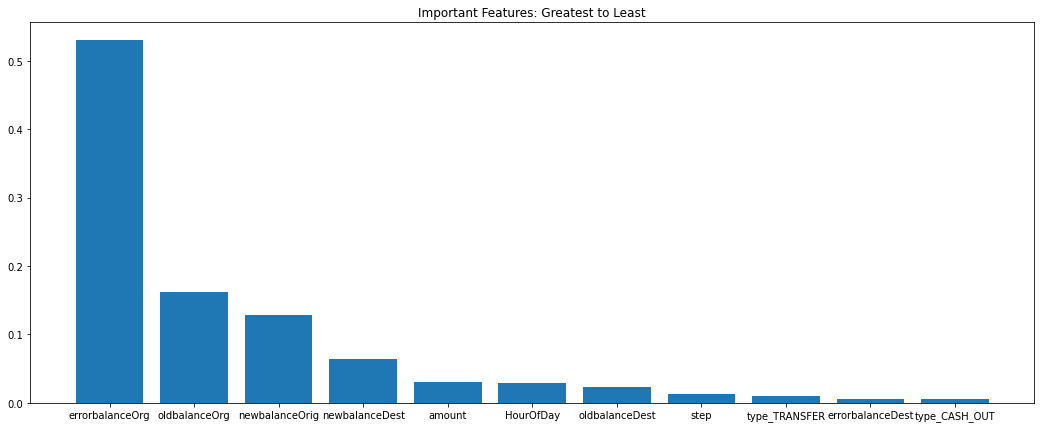

In [46]:
ncols = len(X.columns)
x = np.arange(ncols)

# getting importances of features
importances = RF.feature_importances_

# getting the indices of the most important feature to least important
sort_ind = np.argsort(importances)[::-1]
plt.figure(figsize=(18,7))
plt.bar(x, importances[sort_ind])
plt.xticks(x,tuple(X.columns.values[sort_ind]))
plt.title("Important Features: Greatest to Least")
plt.show()

From the result above, it seems that errorBalanceOrg ended by the most important feature by far for classifying transactions followed by oldBalanceOrg and newBalanceOrig.

# **Conclusion**

* The dataset is huge with over 6 million observations, and the ratio of fraud to valid transactions is heavily skewed towads valid transactions
* Based on EDA we have drop som unused columns that are `nameOrig`, `nameDest`, `isFlaggedFraud`  and also adding new features namely `errorbalanceOrg`, `errorbalanceDest`, `HourOfDay`
* Random Forest Classifier is the best model in the given situation as it is fairly accurate in predicting both fraud and valid transactions, and has the highest AUC in both unbalanced and balanced dataset
* The most important feature by far for classifying transactions is errorBalanceOrg followed by oldBalanceOrg and newBalanceOrig.
